In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss as J01
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.tree as tree
from sklearn.metrics import accuracy_score, classification_report

In [4]:
seed = 1234
np.random.seed(seed)

In [5]:
header = ["age", "Job-type", "fnlwgt", "edu", "edu-num", "marital-status", "Job", "Relationship", "race", "sex", "gain", "loss", "hrs/week", "naive", "income"]
df = pd.read_csv('adult/adult.data', low_memory = False, names=header)
df.drop("edu", axis = 1, inplace = True)
for column, series in df.items():
    form = type(series.tolist()[0])
    label_encoder = LabelEncoder()
    if(form != int):
        df[column] = label_encoder.fit_transform(df[column])
print(df)

       age  Job-type  fnlwgt  edu-num  marital-status  Job  Relationship  \
0       39         7   77516       13               4    1             1   
1       50         6   83311       13               2    4             0   
2       38         4  215646        9               0    6             1   
3       53         4  234721        7               2    6             0   
4       28         4  338409       13               2   10             5   
...    ...       ...     ...      ...             ...  ...           ...   
32556   27         4  257302       12               2   13             5   
32557   40         4  154374        9               2    7             0   
32558   58         4  151910        9               6    1             4   
32559   22         4  201490        9               4    1             3   
32560   52         5  287927        9               2    4             5   

       race  sex   gain  loss  hrs/week  naive  income  
0         4    1   2174     0 

In [6]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=seed)

In [7]:
clf = tree.DecisionTreeClassifier(max_depth = 100, 
                                  criterion = 'entropy', 
                                  random_state = seed)
clf.fit(Xtr, ytr)

train_preds = clf.predict(Xtr)
test_preds = clf.predict(Xte)

train_error = np.mean(ytr != train_preds)
test_error = np.mean(yte != test_preds)

print(train_error)
print(test_error)

3.839066339066339e-05
0.185014586212191


# Random Forest Classifier

15


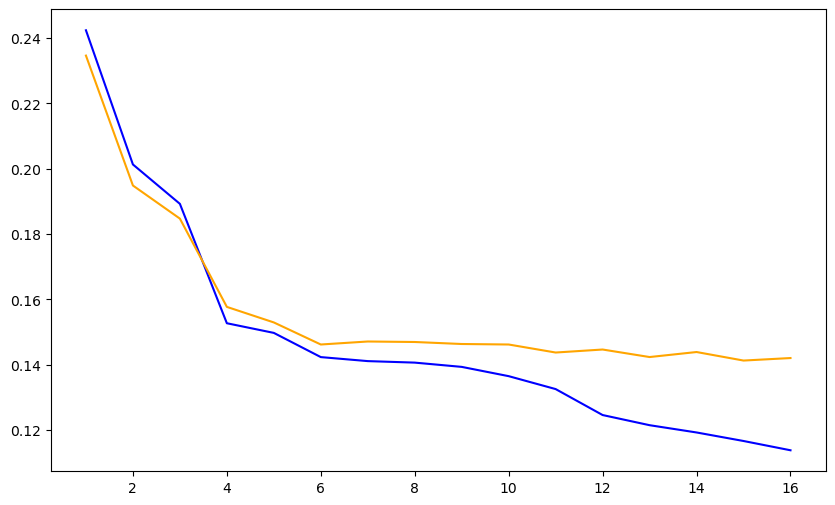

In [9]:
depths = range(1, 17)
train_errors = []
val_errors = []

for depth in depths:
    rfc = RandomForestClassifier(max_depth = depth, 
                                 n_estimators=50, 
                                 min_samples_leaf = 5,
                                 criterion = 'entropy', 
                                 random_state = seed)
    rfc.fit(Xtr, ytr)
    
    train_preds = rfc.predict(Xtr)
    test_preds = rfc.predict(Xte)
    
    train_errors.append(np.mean(ytr != train_preds))
    val_errors.append(np.mean(yte != test_preds))

plt.figure(figsize=(10,6))
plt.plot(depths, train_errors, label = 'Training Error', color = 'blue')
plt.plot(depths, val_errors, label = 'Validation Error', color = 'orange')
print(depths[np.argmin(val_errors)])

13


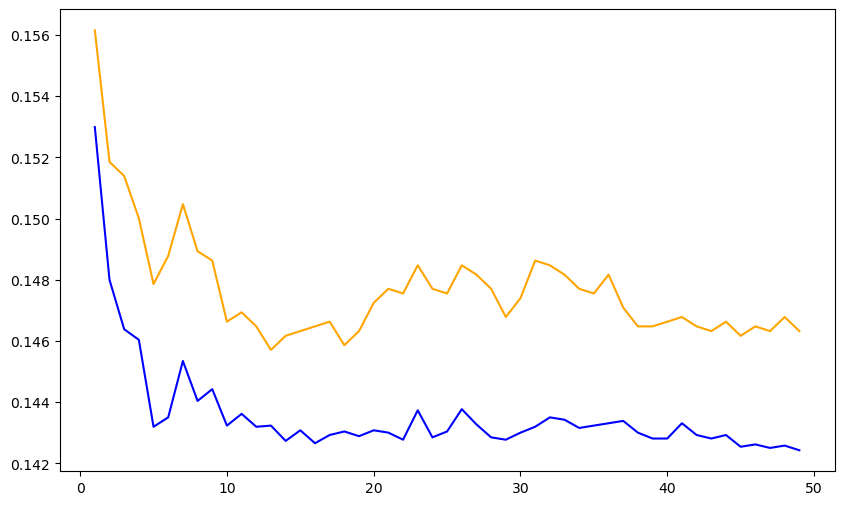

In [10]:
estimators = range(1, 50)
train_errors = []
val_errors = []

for estimator in estimators:
    rfc = RandomForestClassifier(max_depth = 6, 
                                 n_estimators=estimator, 
                                 min_samples_leaf = 5,
                                 criterion = 'entropy', 
                                 random_state = seed)
    rfc.fit(Xtr, ytr)
    
    train_preds = rfc.predict(Xtr)
    test_preds = rfc.predict(Xte)
    
    train_errors.append(np.mean(ytr != train_preds))
    val_errors.append(np.mean(yte != test_preds))

plt.figure(figsize=(10,6))
plt.plot(estimators, train_errors, label = 'Training Error', color = 'blue')
plt.plot(estimators, val_errors, label = 'Validation Error', color = 'orange')
print(estimators[np.argmin(val_errors)])

10


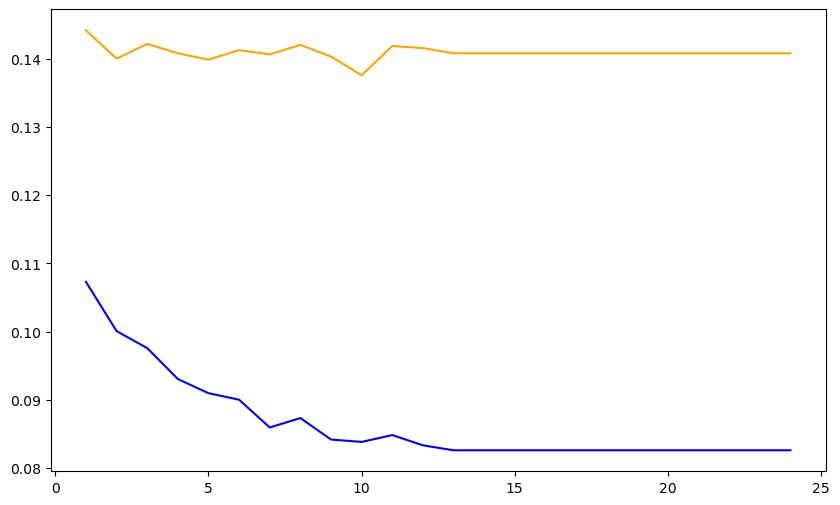

In [11]:
max_feature = range(1, 25)
train_errors = []
val_errors = []

for feature in max_feature:
    rfc = RandomForestClassifier(max_depth = 15, 
                                 n_estimators= 42, 
                                 max_features = feature,
                                 criterion = 'entropy', 
                                 random_state = seed)
    rfc.fit(Xtr, ytr)
    
    train_preds = rfc.predict(Xtr)
    test_preds = rfc.predict(Xte)
    
    train_errors.append(np.mean(ytr != train_preds))
    val_errors.append(np.mean(yte != test_preds))
    
print(estimators[np.argmin(val_errors)])
plt.figure(figsize=(10,6))
plt.plot(max_feature, train_errors, label = 'Training Error', color = 'blue')
plt.plot(max_feature, val_errors, label = 'Validation Error', color = 'orange')

5


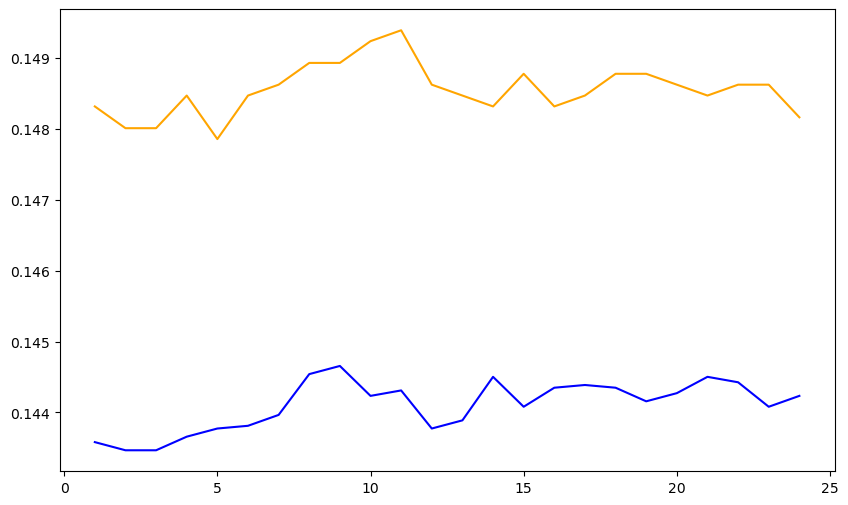

In [12]:
sample_split = range(1, 25)
train_errors = []
val_errors = []

for sample in sample_split:
    rfc = RandomForestClassifier(max_depth = 6, 
                                 n_estimators= 42, 
                                 max_features = 8,
                                 min_samples_leaf = sample,
                                 criterion = 'entropy', 
                                 random_state = seed)
    rfc.fit(Xtr, ytr)
    
    train_preds = rfc.predict(Xtr)
    test_preds = rfc.predict(Xte)
    
    train_errors.append(np.mean(ytr != train_preds))
    val_errors.append(np.mean(yte != test_preds))
    
print(estimators[np.argmin(val_errors)])
plt.figure(figsize=(10,6))
plt.plot(sample_split, train_errors, label = 'Training Error', color = 'blue')
plt.plot(sample_split, val_errors, label = 'Validation Error', color = 'orange')

In [13]:
rfc = RandomForestClassifier(max_depth = 6, 
                                 n_estimators= 42, 
                                 max_features = 8,
                                 min_samples_leaf = 4,
                                 criterion = 'entropy', 
                                 random_state = seed)
rfc.fit(Xtr, ytr)
    
train_preds = rfc.predict(Xtr)
test_preds = rfc.predict(Xte)

train_error = np.mean(ytr != train_preds)
test_error = np.mean(yte != test_preds)

print(train_error)
print(test_error)

0.1436578624078624
0.14847228619683708


# Decision Tree Classifier

7


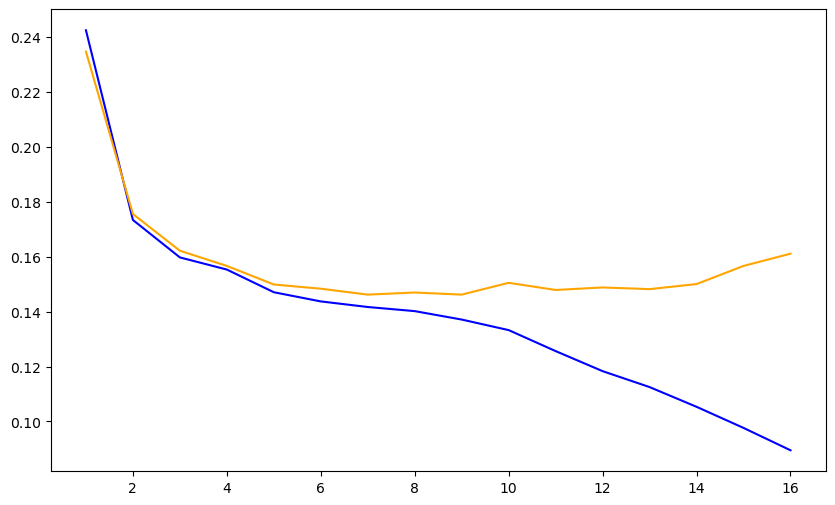

In [15]:
depths = range(1, 17)
train_errors = []
val_errors = []

for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth = depth, 
                                 criterion = 'entropy', 
                                 random_state = seed)
    clf.fit(Xtr, ytr)
    
    train_preds = clf.predict(Xtr)
    test_preds = clf.predict(Xte)
    
    train_errors.append(np.mean(ytr != train_preds))
    val_errors.append(np.mean(yte != test_preds))

plt.figure(figsize=(10,6))
plt.plot(depths, train_errors, label = 'Training Error', color = 'blue')
plt.plot(depths, val_errors, label = 'Validation Error', color = 'orange')
print(depths[np.argmin(val_errors)])

2


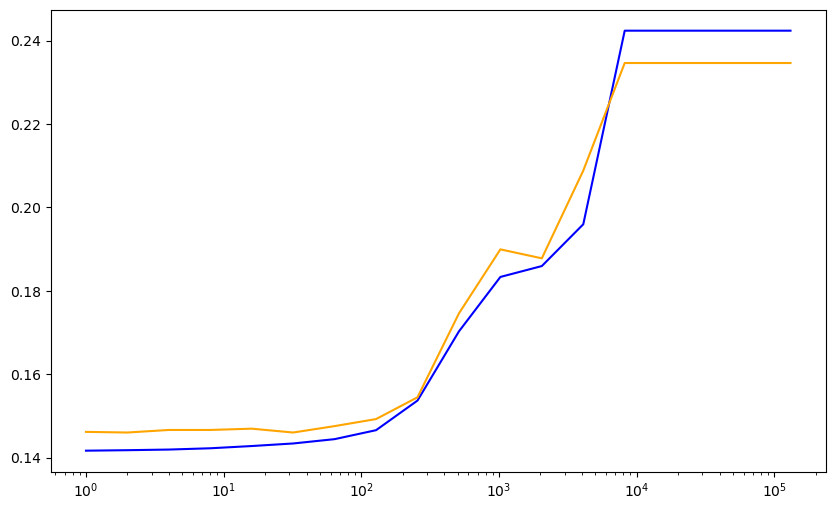

In [16]:
sample_leaf = [2**i for i in range(18)]

train_errors = []
val_errors = []

for leaf in sample_leaf:
    clf = tree.DecisionTreeClassifier(max_depth = 7, 
                                      min_samples_leaf = leaf,
                                      criterion = 'entropy', 
                                      random_state = seed)
    clf.fit(Xtr, ytr)
    
    train_preds = clf.predict(Xtr)
    test_preds = clf.predict(Xte)
    
    train_errors.append(np.mean(ytr != train_preds))
    val_errors.append(np.mean(yte != test_preds))

plt.figure(figsize=(10,6))
plt.xscale("log")
plt.plot(sample_leaf, train_errors, label = 'Training Error', color = 'blue')
plt.plot(sample_leaf, val_errors, label = 'Validation Error', color = 'orange')
print(sample_leaf[np.argmin(val_errors)])

2


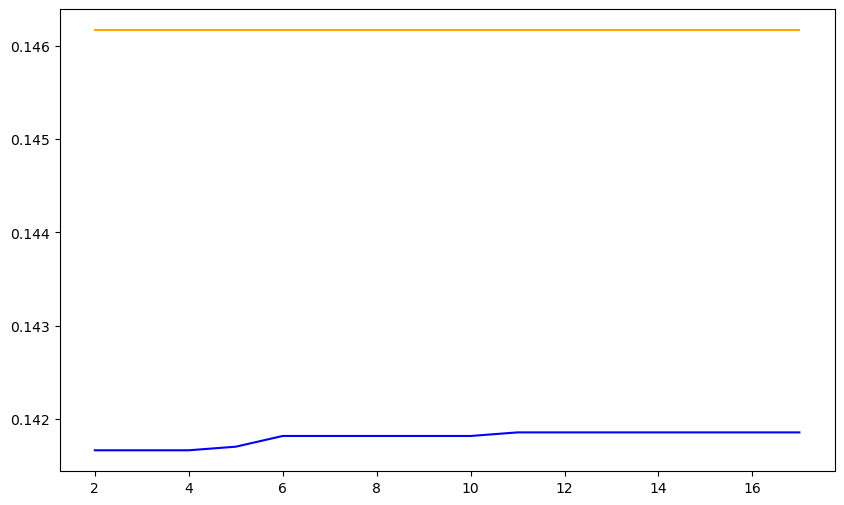

In [17]:
sample_split = range(2, 18)

train_errors = []
val_errors = []

for split in sample_split:
    clf = tree.DecisionTreeClassifier(max_depth = 7, 
                                      min_samples_leaf = 1,
                                      min_samples_split = split,
                                      criterion = 'entropy', 
                                      random_state = seed)
    clf.fit(Xtr, ytr)
    
    train_preds = clf.predict(Xtr)
    test_preds = clf.predict(Xte)
    
    train_errors.append(np.mean(ytr != train_preds))
    val_errors.append(np.mean(yte != test_preds))

plt.figure(figsize=(10,6))
plt.plot(sample_split, train_errors, label = 'Training Error', color = 'blue')
plt.plot(sample_split, val_errors, label = 'Validation Error', color = 'orange')
print(sample_split[np.argmin(val_errors)])

In [18]:
clf = tree.DecisionTreeClassifier(max_depth = 7, 
                                      min_samples_leaf = 1,
                                      min_samples_split = 2,
                                      criterion = 'entropy', 
                                      random_state = seed)
clf.fit(Xtr, ytr)
    
train_preds = clf.predict(Xtr)
test_preds = clf.predict(Xte)
    
print(np.mean(ytr != train_preds))
print(np.mean(yte != test_preds))

0.14166154791154792
0.14616920006141562


In [1]:
print(work)

NameError: name 'work' is not defined